<a href="https://colab.research.google.com/github/huwjjeong/-project/blob/main/%EC%A3%BC%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


In [2]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
!pip install mplfinance

In [11]:
!pip install --upgrade mplfinance

In [53]:
!pip install --upgrade mplfinance

/tmp/ipython-input-57-1532307799.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2024-01-01", end="2024-12-31", group_by="ticker")
[*********************100%***********************]  1 of 1 completed


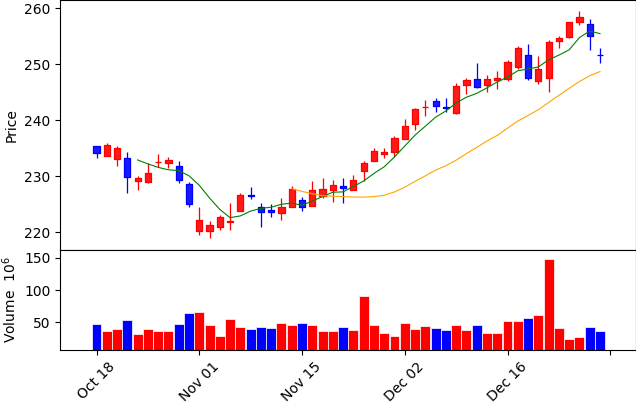

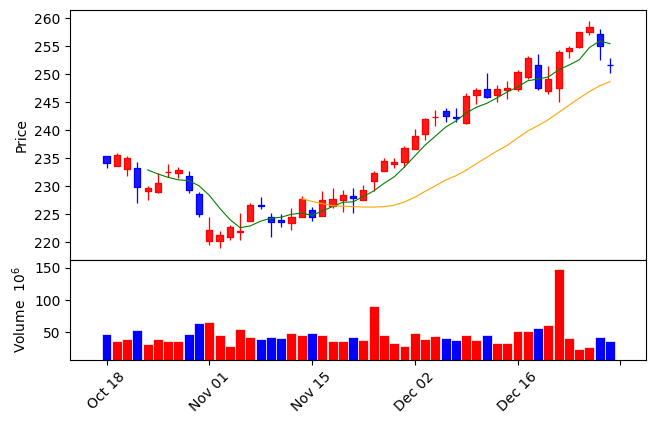

In [57]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.collections import LineCollection, PolyCollection
from IPython.display import Image

# ─── 1) 데이터 불러오기 ───────────────────────────
df = yf.download("AAPL", start="2024-01-01", end="2024-12-31", group_by="ticker")
df = df["AAPL"][['Open','High','Low','Close','Volume']].dropna()

# ─── 2) 스타일 설정 ──────────────────────────────
mc = mpf.make_marketcolors(
    up='red',        # 양봉
    down='blue',     # 음봉
    edge='inherit',     # 봉 바디 테두리 완전 투명
    wick='inherit',    # 심지는 검정 유지
    volume='inherit' # 볼륨 색상은 up/down 따라감
)
style = mpf.make_mpf_style(marketcolors=mc)

# ─── 3) 차트 그리기 (한 번만) ──────────────────────
fig, axes = mpf.plot(
    df[-50:],
    type='candle',
    style=style,
    mav=(5,20,60),
    mavcolors=('green','orange','purple'),
    volume=True,
    returnfig=True,
    block=False,    # 인라인 1차 그리기 억제
    figsize=(8,5)
)

# ─── 4) 하단 볼륨 바 테두리 투명 처리 ─────────────
vol_ax = axes[2]
for bar in vol_ax.patches:
    if isinstance(bar, Rectangle):
        # facecolor는 그대로 두고, 얇은 검정 테두리 추가
        bar.set_edgecolor('white')
        bar.set_linewidth(0.5)
# 4.2) Collection (파란 다운바) 처리
for coll in vol_ax.collections:
    if isinstance(coll, (LineCollection, PolyCollection)):
        coll.set_edgecolor('white')
        coll.set_linewidth(0.5)

# ─── 5) 상단 MA 선 두께 조절 ──────────────────────
for line in axes[0].lines:
    if line.get_color() in ('green','orange','purple'):
        line.set_linewidth(0.8)

# ─── 6) 저장 및 한 번만 출력 ───────────────────────
fig.savefig('chart_final.png', bbox_inches='tight', pad_inches=0)
Image('chart_final.png')